In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv('./sms.csv')
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'], random_state=11)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print('Accuracies: %s' % scores)
print('Mean accuracy: %s' % np.mean(scores))

Accuracies: [0.95221027 0.95454545 0.96172249 0.96052632 0.95209581]
Mean accuracy: 0.9562200683094717


In [2]:
precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print('Precision: %s' % np.mean(precisions))
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print('Recall: %s' % np.mean(recalls))

Precision: 0.992542742398164
Recall: 0.6836050302748021


In [3]:
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print('F1 score: %s' % np.mean(f1s))

F1 score: 0.8090678466269784


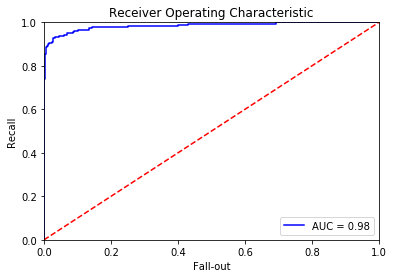

In [4]:
predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()